In [1]:
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
conn = sqlite3.connect(r"C:\Users\esthe\Downloads\attr_data.db")

In [3]:
df = pd.read_sql_query("SELECT * FROM attrition_records", conn)

In [4]:
df.head(12)

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
5,6,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,...,3,80,0,8,2,2,7,7,3,6
6,7,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,...,1,80,3,12,3,2,1,0,0,0
7,8,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,...,2,80,1,1,2,3,1,0,0,0
8,9,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,...,2,80,0,10,2,3,9,7,1,8
9,10,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,...,2,80,2,17,3,2,7,7,7,7


# Data Cleaning

In [5]:
# check title column spacing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [6]:
# check data description
df.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.corr()

C:\Users\esthe\AppData\Local\Temp\ipykernel_6420\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
id,1.000000,-0.010349,-0.051484,0.032928,0.041901,NaN,0.999906,0.017424,0.034754,-0.007105,...,-0.069654,NaN,0.062452,-0.014095,0.023907,0.010740,-0.011557,-0.008853,-0.009151,-0.009432
Age,-0.010349,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,-0.051484,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,0.032928,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.041901,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,0.999906,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.017424,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.034754,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,-0.007105,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


Text(0.5, 0.98, 'THE DISTRIBUTION OF FACTORS BEHIND EMOLOYEE ATTRITION')

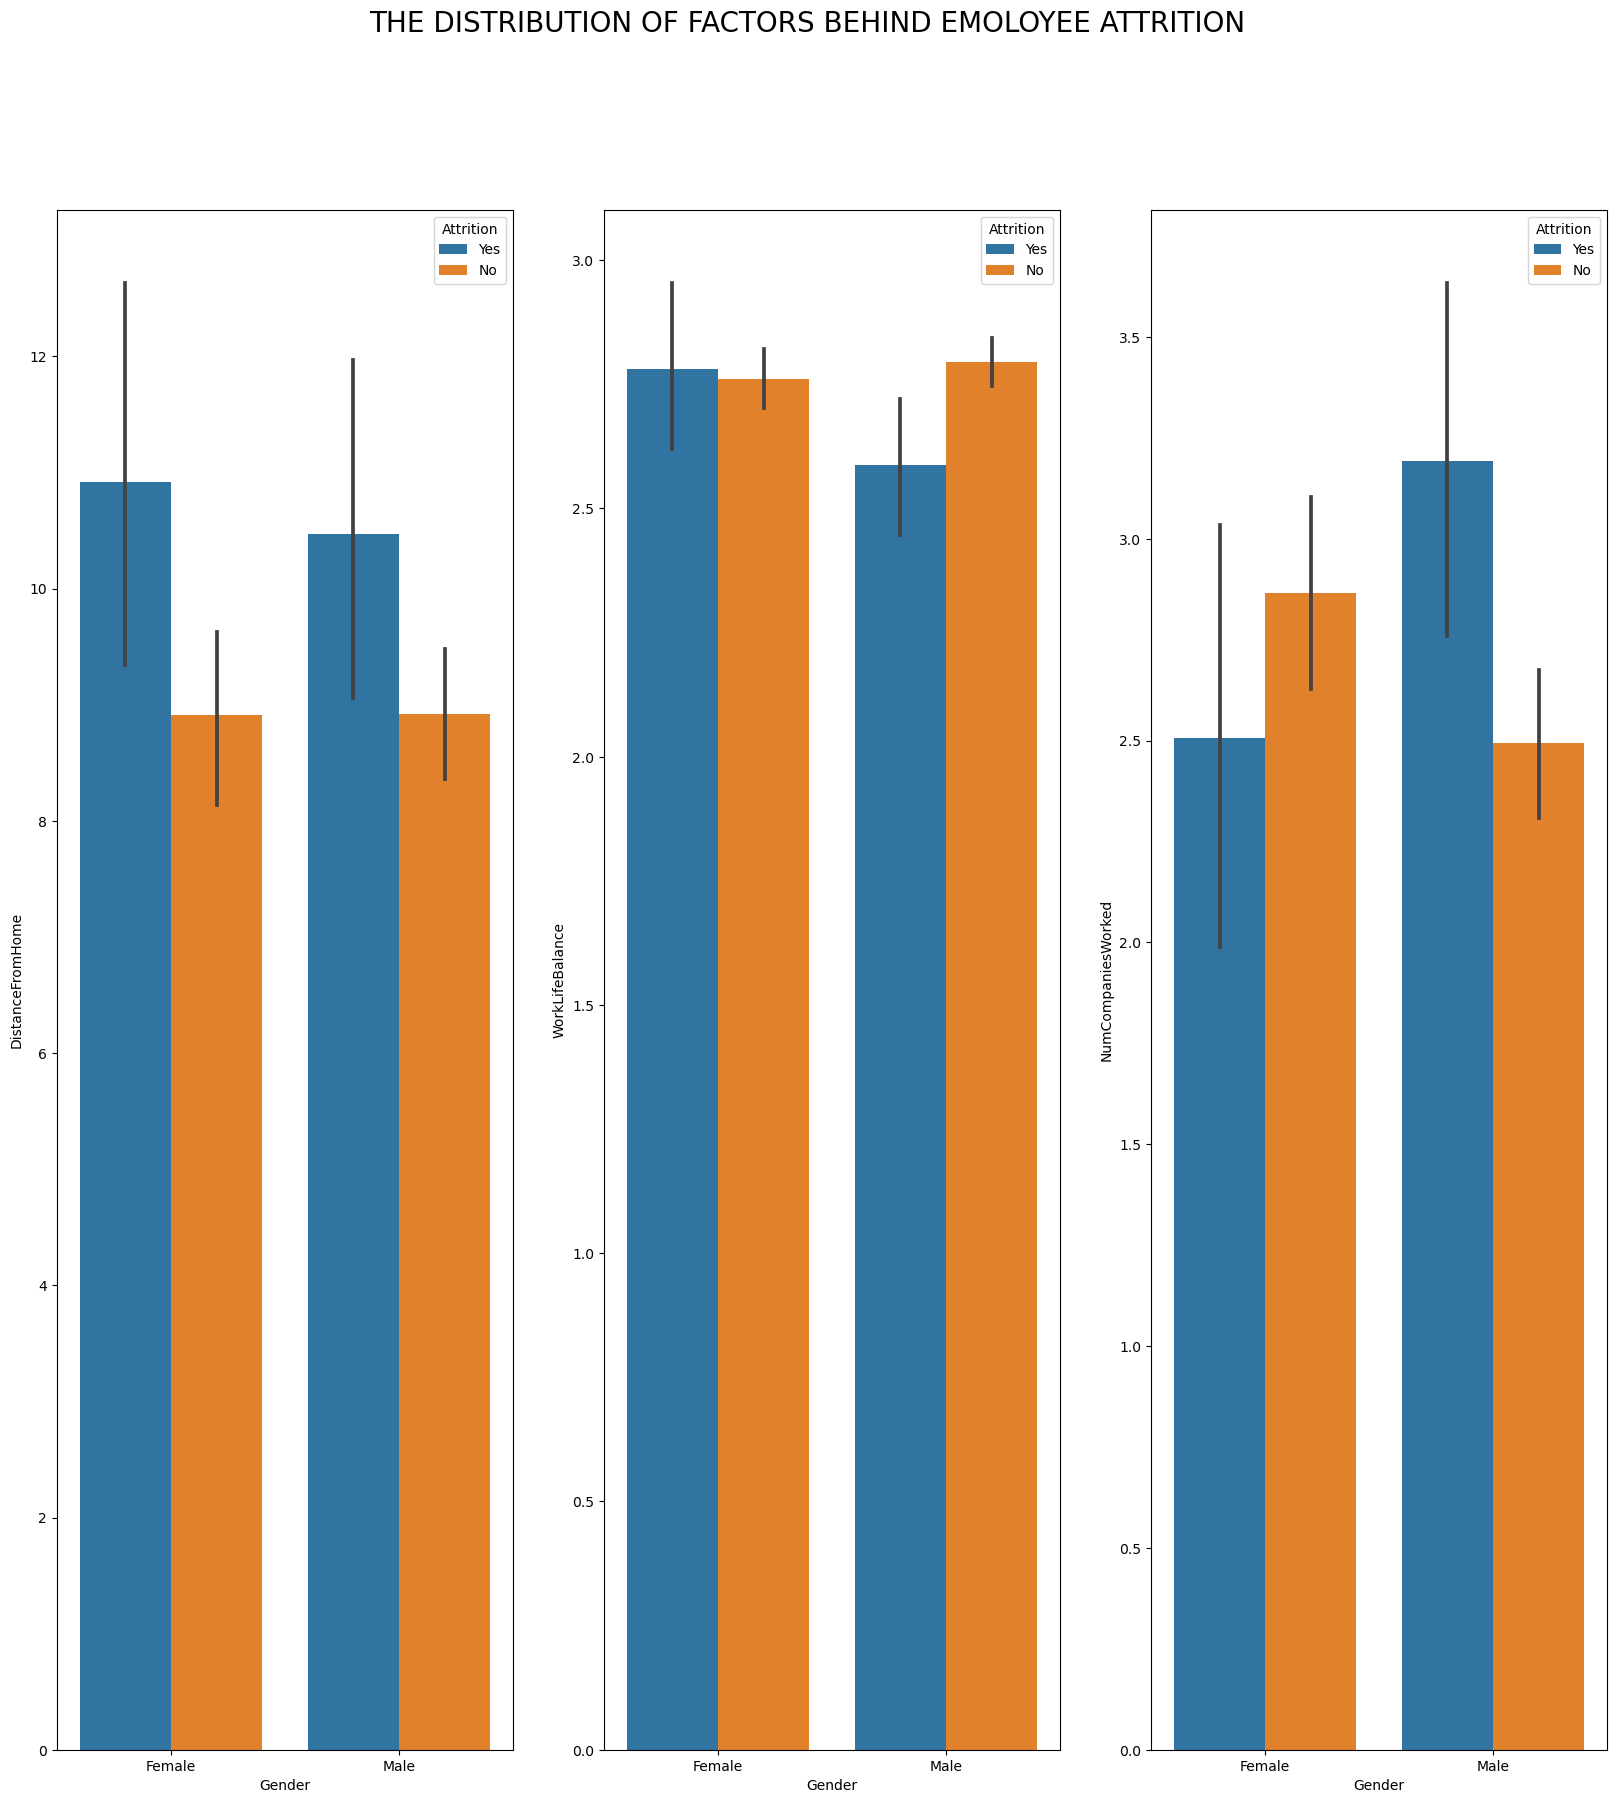

In [8]:
#What do you think are the 3 factors behind employee attrition?
fig,ax = plt.subplots(1,3, figsize=(20,20))               
sns.barplot(data=df, x="Gender", y= 'DistanceFromHome', hue= 'Attrition', ax = ax[0]);
sns.barplot(data=df, x="Gender", y= 'WorkLifeBalance', hue= 'Attrition', ax = ax[1]);
sns.barplot(data=df, x="Gender", y= 'NumCompaniesWorked', hue= 'Attrition', ax = ax[2]);
plt.suptitle("the distribution of factors behind emoloyee attrition".upper(), fontsize=20)

Text(0.5, 0.98, 'ATTRITION RATE DIFFERNT DEPARTMENTS')

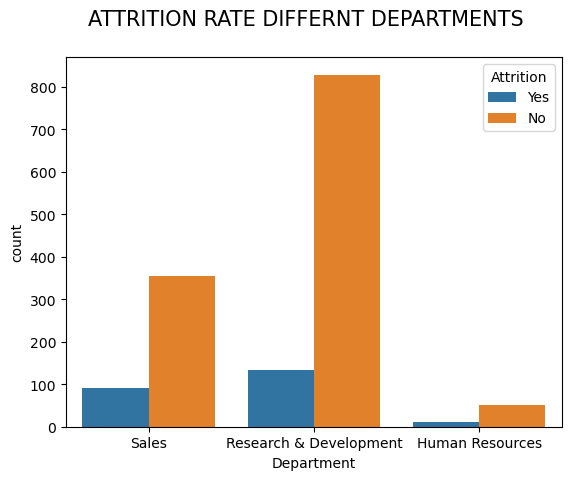

In [9]:
sns.countplot(x='Department',data=df,hue='Attrition')
plt.suptitle("attrition rate differnt departments".upper(), fontsize=15)

# OBSERVATION:
From the above analysis we can deduce that the farther away an employee's home is, the more likely they are to exit the company.  
The work life balance and number of companies of an  employee also has a negative impact on attrition and can also be seen as a major reason for attriton.
It is also worhty to note that the attrition rate is more in the research and development department as opposed to the reduced rate in human resources. 

Text(0.5, 0.98, 'THE RELATIONSHIP BETWEEN EDUCATION AND MONTHLY INCOME')

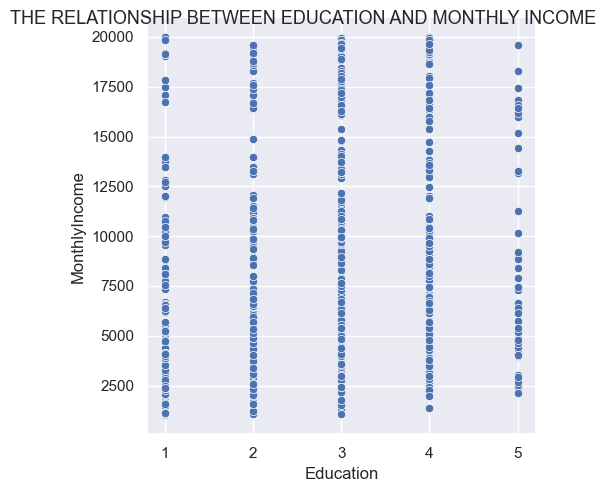

In [10]:
#What is the relationship between Education and Monthly Income?
sns.set_theme(style="darkgrid")
sns.relplot(data=df, x="Education", y="MonthlyIncome")
plt.suptitle("the relationship between education and monthly income".upper(), fontsize=13)

# OBSERVATION:
From the above plot we can tell that the more educated an employee is the higher their income. 

Text(0.5, 0.98, 'THE EFFECT OF AGE ON ATTRITION')

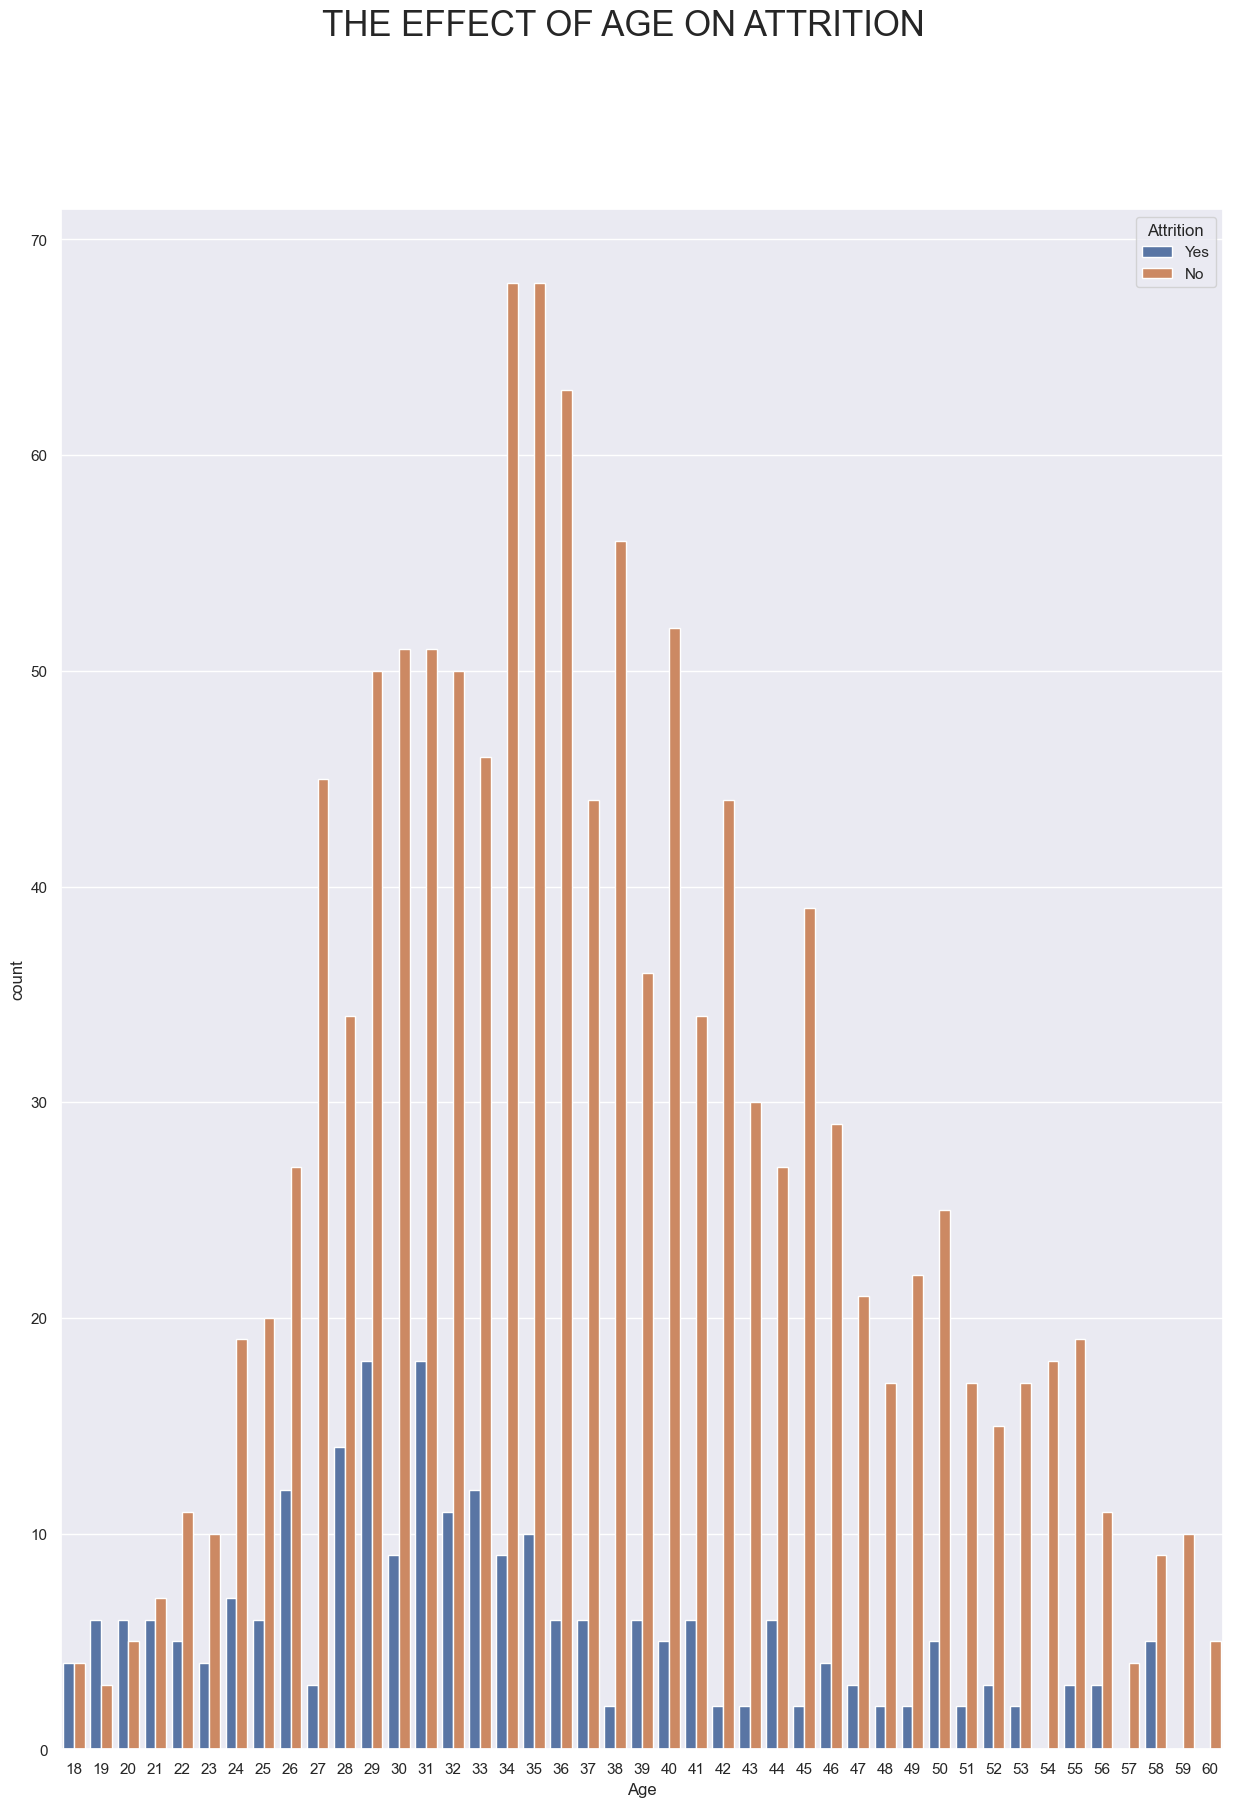

In [22]:
#What is the effect of age on attrition?
fig, ax = plt.subplots(figsize=(15,20))
sns.countplot(x='Age', data=df, hue='Attrition')
plt.suptitle("the effect of age on attrition".upper(), fontsize=25)

# OBSERVATION:
The above visualization shows us that attrition rate is more rampant from age 29 to 31.

Text(0.5, 0.98, 'MONTHLY INCOME AS A FACTOR IN ATTRITION')

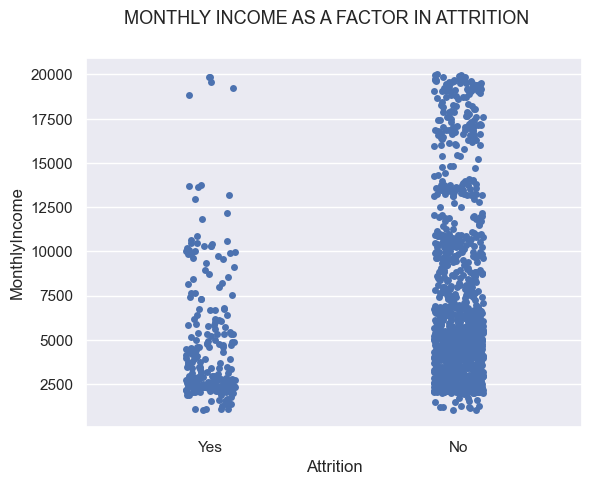

In [24]:
#Is Income the main factor towards employee attrition?
sns.stripplot(x="Attrition", y="MonthlyIncome", data=df) 
plt.suptitle("monthly income as a factor in attrition".upper(), fontsize=13)

# OBSERVATION:
This plot shows up that Monthly Income is not a main factor of attrition as the rate of attrition is comparatively low. 

Text(0.5, 0.98, 'IMPACT OF WORK-LIFE BALANCE ON ATTRITION RATE')

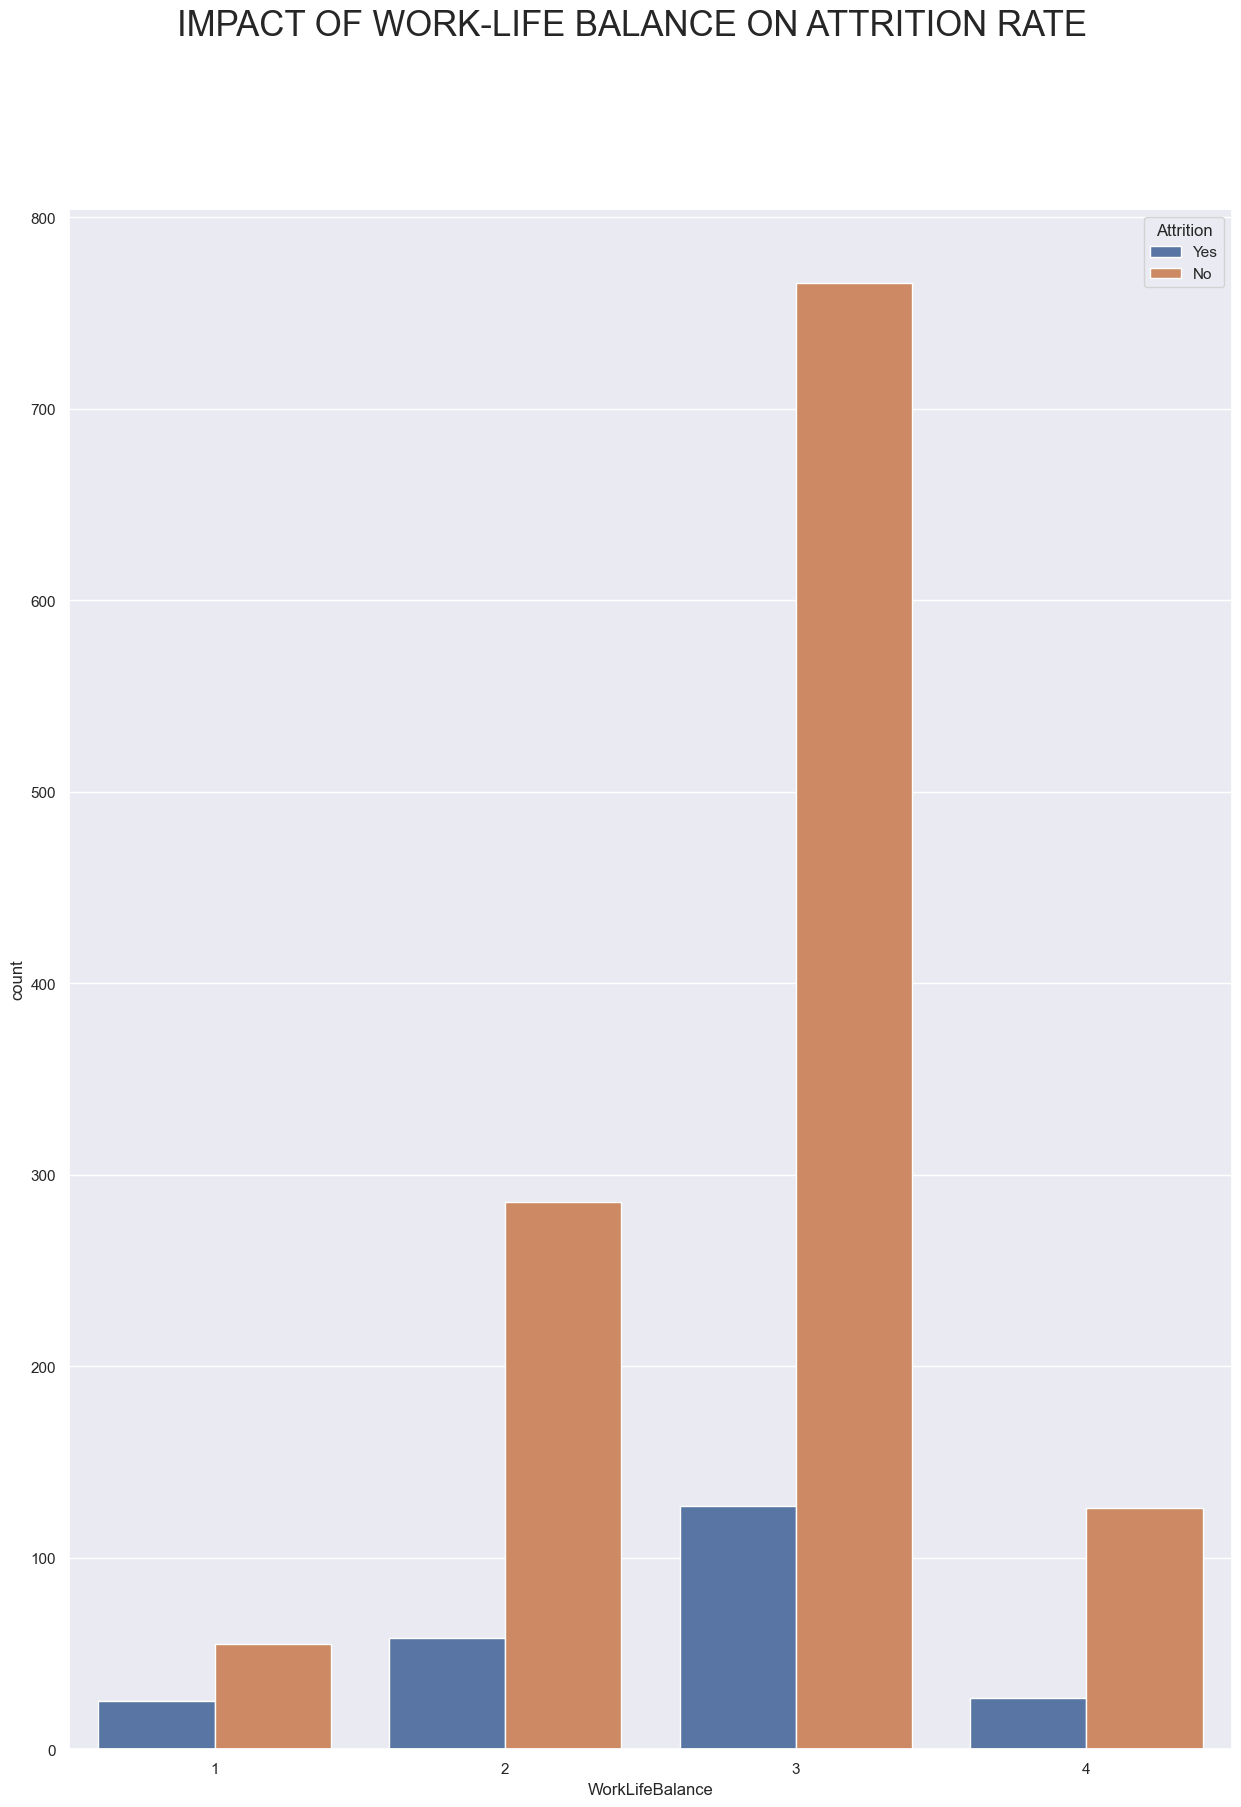

In [27]:
#How does work-life balance impact the overall attrition rate?
fig, ax = plt.subplots(figsize=(15,20))
sns.countplot(x='WorkLifeBalance',data=df,hue='Attrition')
plt.suptitle("impact of work-life balance on attrition rate".upper(), fontsize=25)

Text(0.5, 0.98, 'IMPACT OF WORK-LIFE BALANCE BETWEEN GENDERS ON ATTRITION RATE')

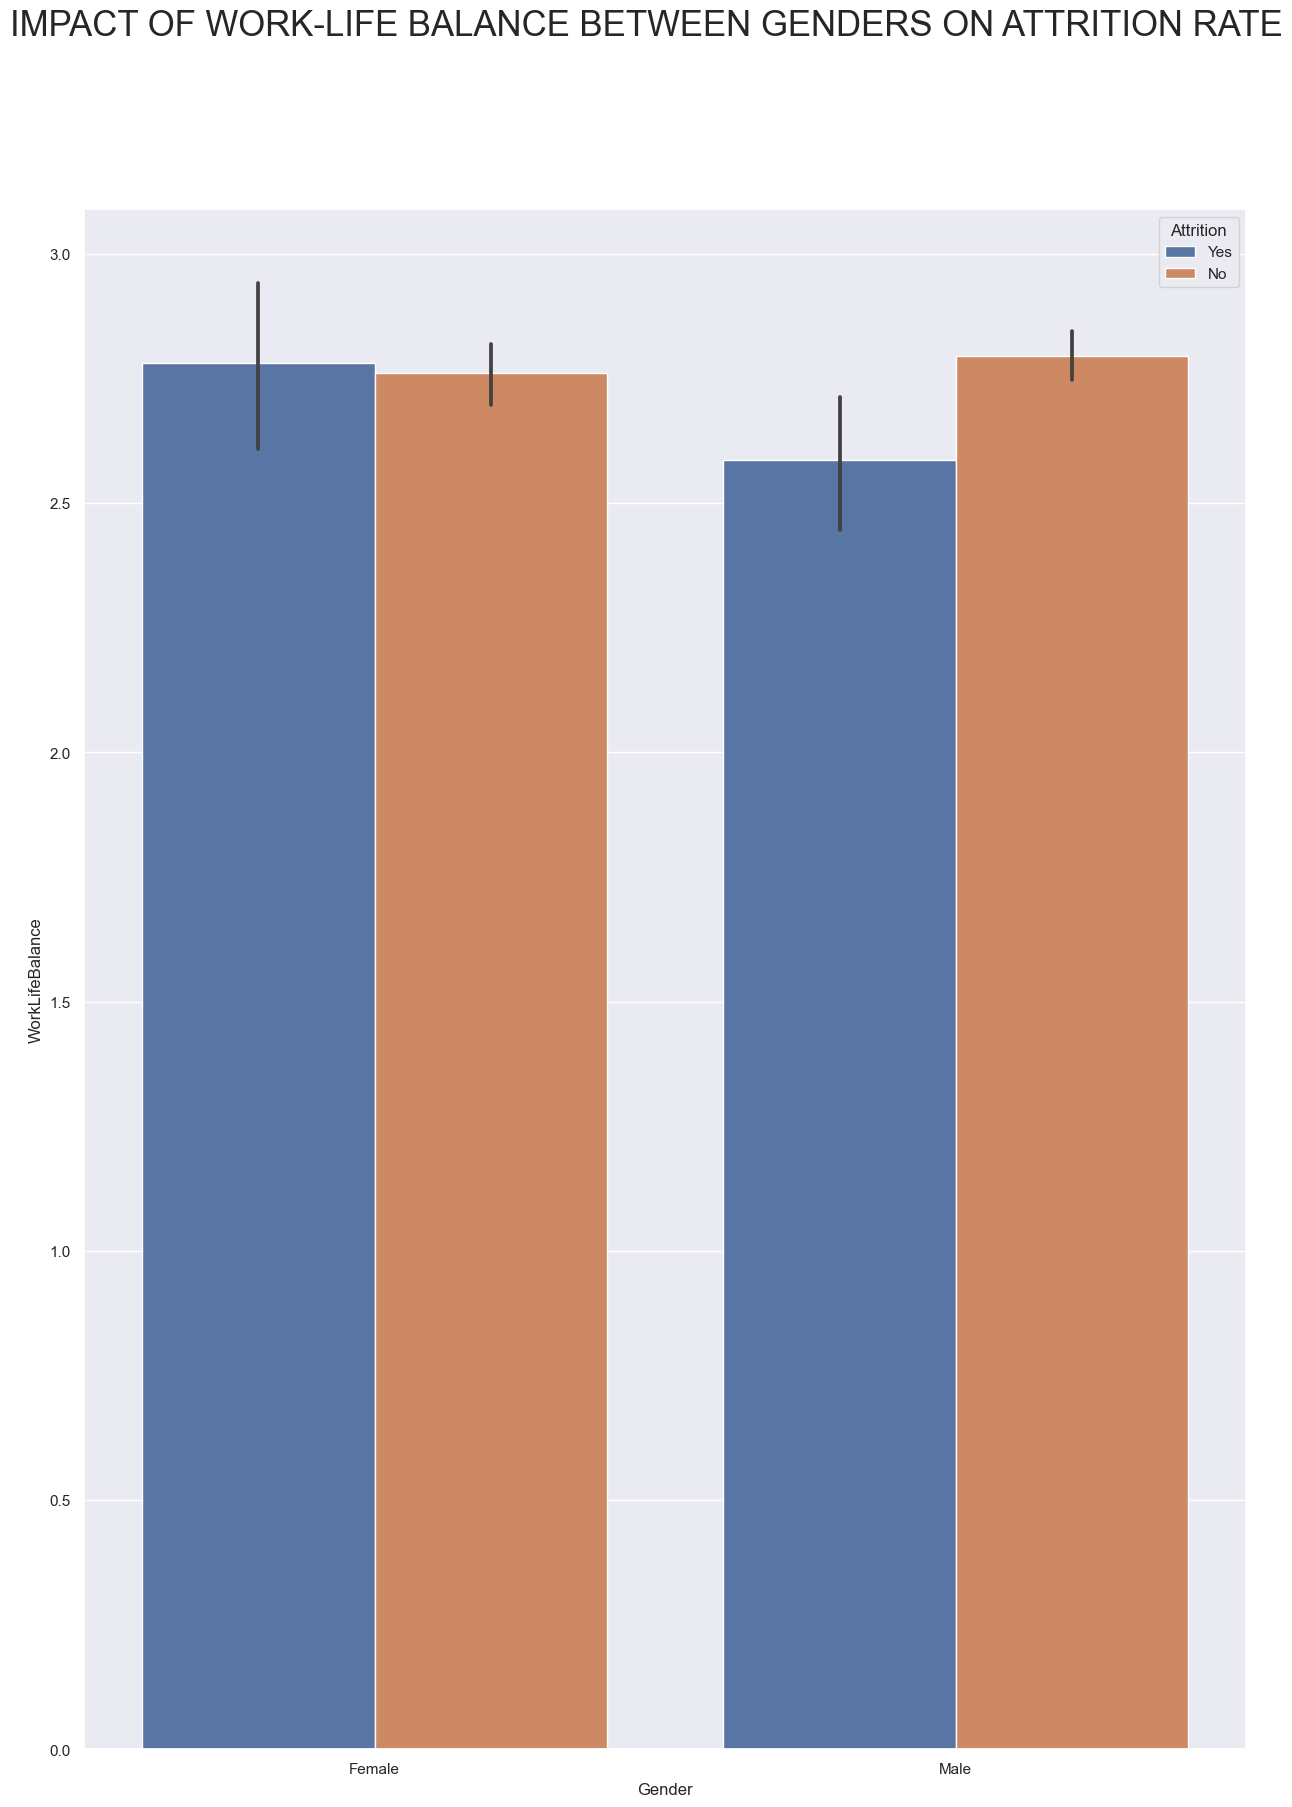

In [29]:
fig, ax = plt.subplots(figsize=(15,20))
sns.barplot(data= df, x='Gender', y='WorkLifeBalance', hue = 'Attrition')
plt.suptitle("impact of work-life balance between genders on attrition rate".upper(), fontsize=25)

# OBSERVATION:
it is seen in the plot that there is a positive relationship between work life balance and attrition rate. 